# Insights
How can the U.S. improve Air Quality by 5% by 2024 while reducing chemical pollutants? <br>
   - Reducing Nitrogen Dioxide (NO2): regulate housing/buildings near power plants, implement WFH business structure <br>
   - Reducing Sulphur Dioxide (SO2): control/minimize the use of high-sulfur coal, implement emissions control tech <br>
   - Reducing Ozone (O3): regulate toxic cleaning materials, implement ozone awareness times <br>
   - Reducing Carbon Monoxide (CO): reduce the use of fossil fuels, replace fossil fuel usage with solar energy <br>

### Data Cleansing
The purpose of data cleansing is to prevent incorrectly formatted, duplicates, and/or corrupted data from skewing an analysis. Removing duplicates, irrelevant observations, fix structural errors, filter unwanted outliers, and handle missing data can create a more accurate data decision-making process.

In [1]:
#Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick


#Import data source and create a reference to the CSV using Pandas as df_raw
df_raw = pd.read_csv('pollution_us_2000_2016.csv')

#Print each State provided in the dataframe and descriptive statistics using .info()
print(df_raw['State'].unique())
print(df_raw.info())

['Arizona' 'California' 'Colorado' 'District Of Columbia' 'Florida'
 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana' 'Michigan'
 'Missouri' 'New Jersey' 'New York' 'North Carolina' 'Oklahoma'
 'Pennsylvania' 'Texas' 'Virginia' 'Massachusetts' 'Nevada'
 'New Hampshire' 'Tennessee' 'South Carolina' 'Connecticut' 'Iowa' 'Maine'
 'Maryland' 'Wisconsin' 'Country Of Mexico' 'Arkansas' 'Oregon' 'Wyoming'
 'North Dakota' 'Idaho' 'Ohio' 'Georgia' 'Delaware' 'Hawaii' 'Minnesota'
 'New Mexico' 'Rhode Island' 'South Dakota' 'Utah' 'Alabama' 'Washington'
 'Alaska']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8 

In [2]:
#Remove unnecessary columns as df
df = df_raw.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Mean','NO2 Units','O3 Mean','O3 Units','SO2 Mean','SO2 Units','CO Mean','CO Units',], axis=1)
#Remove 'Country Of Mexico'
df = df[df.State!='Country Of Mexico']

#Identify null values
print(df.isnull().sum())
print(df.head())

State                     0
County                    0
City                      0
Date Local                0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              868155
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               868582
dtype: int64
     State    County     City  Date Local  NO2 1st Max Value  \
0  Arizona  Maricopa  Phoenix  2000-01-01               49.0   
1  Arizona  Maricopa  Phoenix  2000-01-01               49.0   
2  Arizona  Maricopa  Phoenix  2000-01-01               49.0   
3  Arizona  Maricopa  Phoenix  2000-01-01               49.0   
4  Arizona  Maricopa  Phoenix  2000-01-02               36.0   

   NO2 1st Max Hour  NO2 AQI  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
0                19       46             0.040               10      34   
1   

In [3]:
#SO2 AQI and CO AQI have significant values missing
#Drop the rows were at least one element is missing (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
df = df.dropna()

#Remove duplicated data (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
df = df.drop_duplicates()
print(df.count())

State                431165
County               431165
City                 431165
Date Local           431165
NO2 1st Max Value    431165
NO2 1st Max Hour     431165
NO2 AQI              431165
O3 1st Max Value     431165
O3 1st Max Hour      431165
O3 AQI               431165
SO2 1st Max Value    431165
SO2 1st Max Hour     431165
SO2 AQI              431165
CO 1st Max Value     431165
CO 1st Max Hour      431165
CO AQI               431165
dtype: int64


### Insight 1:
After importing the needed libraries and data source, we dropped the unneccessary columns from the dataframe, eliminated duplicates, and removed all rows containing null values. We printed the dataframe values and found there was still significant data to work with and to answer the over-arching Issue Statement.<br>

We will reformat a few columns, such as 'Date Local', and begin our analysis.

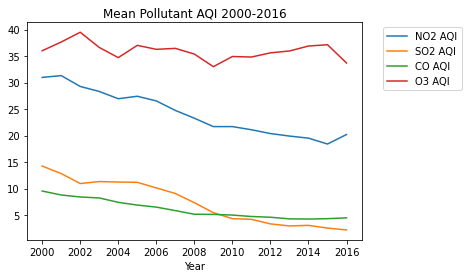

In [4]:
df['Year'] = pd.DatetimeIndex(df['Date Local']).year
df['Month'] = pd.DatetimeIndex(df['Date Local']).month
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d')

#Plot the pollutant means over time
us_aqi = df[['NO2 AQI','SO2 AQI','CO AQI','O3 AQI','Year']]
us_aqi = us_aqi.groupby(by=['Year']).mean()
us_aqi.plot(kind='line', title='Mean Pollutant AQI 2000-2016')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Insight 2:
Plotting the pollutant means overtime gives us insight as to which is the most contributing pollutant chemical and the growth or decrease through the years. Notice that CO, SO2, and NO2 have a decreasing trend, yet O3 (the highest contributor) has not significantly changed since 2000. 

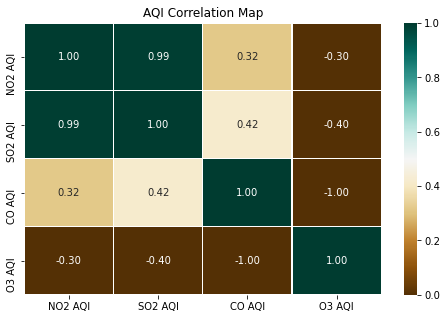

In [5]:
aqi = df[['NO2 AQI','SO2 AQI','CO AQI','O3 AQI']]
heatmap = aqi.iloc[:3].corr()
plt.figure(figsize=(8,5))
sns.heatmap(heatmap, annot=True, linewidths=0.1, cmap='BrBG', fmt = ".2f", vmin=0, vmax=1)
plt.title("AQI Correlation Map")
plt.show()

### Insight 3:
Although AQI consists of all 4 chemicals, we can take a closer look at which pollutants depend on eachother. Based off the correlation heatmap SO2 and NO2 almost completely correlate with one another. The Mean Pollutant AQI line graph in Insight 2 corresponds with this result. 

Let's take a further look into which states contain the highest AQIs among each pollutant with this insight in mind.

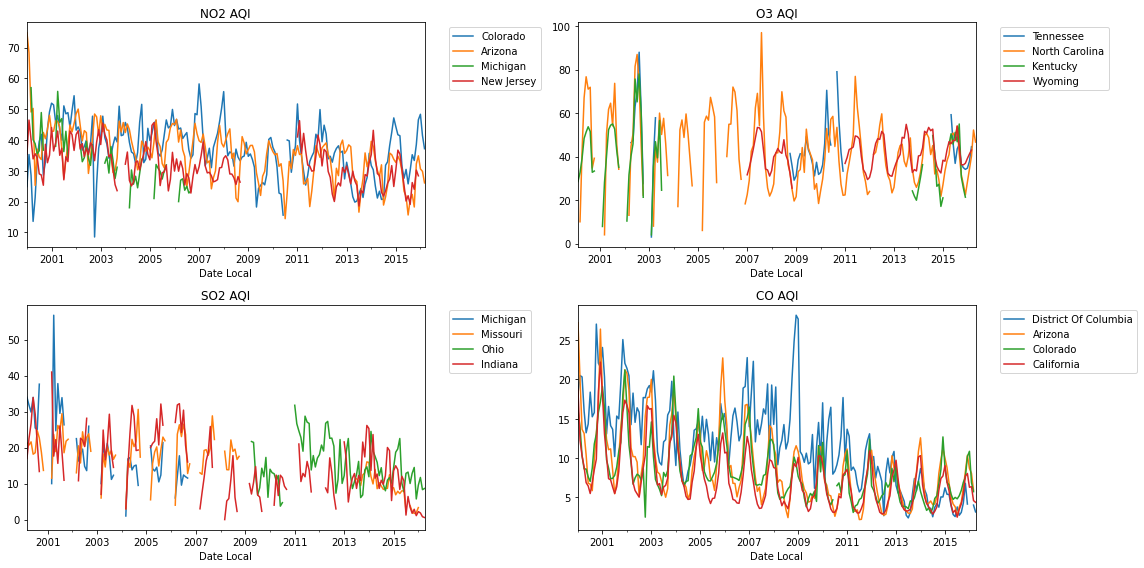

In [6]:
state_aqi = df.groupby(['State','Date Local']).mean()  
state_aqi = state_aqi.groupby(level=0)
plt.figure(figsize=(16,8))

# NO2 AQI
plt.subplot(2,2,1)
topNO2 = state_aqi['NO2 AQI']
topNO2_state = topNO2.mean().nlargest(4).index
for idex in range(len(topNO2_state)):
    topNO2.get_group(topNO2_state[idex]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(topNO2_state,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('NO2 AQI')

# O3 AQI
plt.subplot(2,2,2)
topO3 = state_aqi['O3 AQI']
topO3_state = topO3.mean().nlargest(4).index
for idex in range(len(topO3_state)):
    topO3.get_group(topO3_state[idex]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(topO3_state,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('O3 AQI')

# SO2 AQI
plt.subplot(2,2,3)
topSO2 = state_aqi['SO2 AQI']
topSO2_state = topSO2.mean().nlargest(4).index
for idex in range(len(topSO2_state)):
    topSO2.get_group(topSO2_state[idex]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(topSO2_state,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('SO2 AQI')

# CO AQI
plt.subplot(2,2,4)
topCO = state_aqi['CO AQI']
topCO_state = topCO.mean().nlargest(4).index
for idex in range(len(topCO_state)):
    topCO.get_group(topCO_state[idex]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(topCO_state,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('CO AQI')

plt.tight_layout()
plt.show()

### Insight 4:
Knowing that O3 is the highest contributing pollutant, we now know that Tennessee, North Carolina, Kentucky, and Wyoming are responsible for producing the most O3 out of all 5 states. 

SO2 and NO2 are almost perfectly correlated with eachother. Michigan appears on both graphs and should be looked at closely. 

CO, although it is the least contributing pollutant chemical, Arizona and Colorado appear in NO2. The graph does show a decreasing trend. Note, the spike in District of Columbia is a possible point of interest.

Now that we've narrowed down the top 13 states of the overall pollution, we'll delve deeper into the YoY change.<br>
**Note that some states are missing data. Although null values have been dropped, the graph includes other states within those years

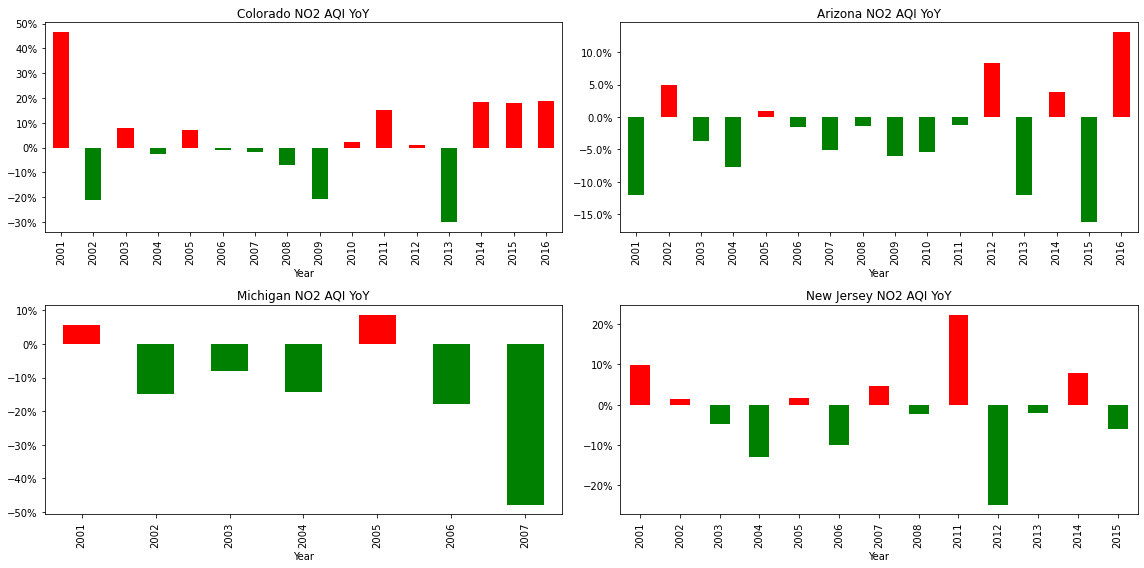

In [7]:
#PCT Change between highest 4 states
pct_aqi = df.groupby(['State','Year']).mean()
#no2_pct = pct_aqi.pct_change()['NO2 AQI'].loc[['Colorado','Arizona','Michigan','New Jersey']]
plt.figure(figsize=(16,8))

# NO2 Change
plt.subplot(2,2,1)
no2_pct = pct_aqi.pct_change()['NO2 AQI'].loc[('Colorado', 2001):('Colorado',2016)]* 100
col = []
for val in no2_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = no2_pct['Colorado'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Colorado NO2 AQI YoY')

plt.subplot(2,2,2)
no2_pct = pct_aqi.pct_change()['NO2 AQI'].loc[('Arizona', 2001):('Arizona',2016)]* 100
col = []
for val in no2_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = no2_pct['Arizona'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Arizona NO2 AQI YoY')

plt.subplot(2,2,3)
no2_pct = pct_aqi.pct_change()['NO2 AQI'].loc[('Michigan', 2001):('Michigan',2016)]* 100
col = []
for val in no2_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = no2_pct['Michigan'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Michigan NO2 AQI YoY')

plt.subplot(2,2,4)
no2_pct = pct_aqi.pct_change()['NO2 AQI'].loc[('New Jersey', 2001):('New Jersey',2016)]* 100
col = []
for val in no2_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = no2_pct['New Jersey'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('New Jersey NO2 AQI YoY')

plt.tight_layout()
plt.show()

### Insight 5 (1):
Colorado: Top contributing state, with a YoY percent increase of a consistant 20% more.<br>
Arizona & Michigan: Both states have had negative contributions and are showing signs of positive change. (Arizona: -15%, Michigan: -50%)<br>
New Jersey: Graph is showing stagnent movement, almost balancing out.

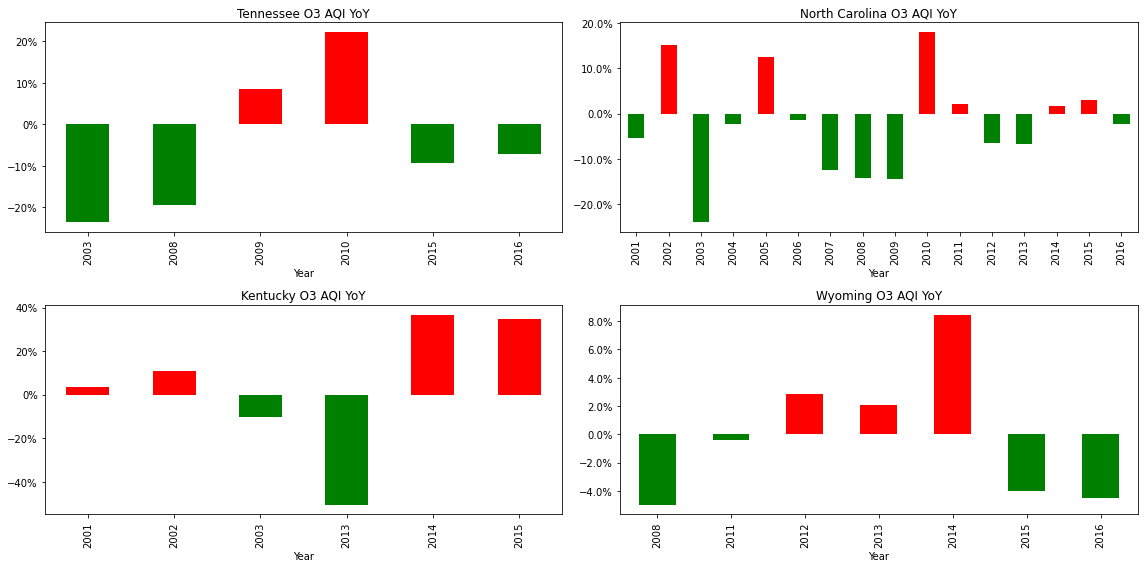

In [8]:
pct_aqi = df.groupby(['State','Year']).mean()
#o3_pct = pct_aqi.pct_change()['O3 AQI'].loc[['Tennessee','North Carolina','Kentucky','Wyoming']]
plt.figure(figsize=(16,8))

# O3 Change
plt.subplot(2,2,1)
o3_pct = pct_aqi.pct_change()['O3 AQI'].loc[('Tennessee', 2003):('Tennessee',2016)]* 100
#Note: data from 2002 pulls from previous cell and skews the graph
col = []
for val in o3_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = o3_pct['Tennessee'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Tennessee O3 AQI YoY')

plt.subplot(2,2,2)
o3_pct = pct_aqi.pct_change()['O3 AQI'].loc[('North Carolina', 2001):('North Carolina',2016)]* 100
col = []
for val in o3_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = o3_pct['North Carolina'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('North Carolina O3 AQI YoY')

plt.subplot(2,2,3)
o3_pct = pct_aqi.pct_change()['O3 AQI'].loc[('Kentucky', 2001):('Kentucky',2016)]* 100
col = []
for val in o3_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = o3_pct['Kentucky'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Kentucky O3 AQI YoY')

plt.subplot(2,2,4)
o3_pct = pct_aqi.pct_change()['O3 AQI'].loc[('Wyoming', 2008):('Wyoming',2016)]* 100
#Note: data from 2007 pulls from previous cell and skews the graph
col = []
for val in o3_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = o3_pct['Wyoming'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Wyoming O3 AQI YoY')

plt.tight_layout()
plt.show()

### Insights 5 (2):
Tennessee: As the top contributing state for O3 which is also the high pollutant, Tennessee is showing a decrease in production by almost -10%. <br>
North Carolina: Shows more change in O3 production YoY between -20% - -10%. <br>
Kentucky: Recent years have shown an increase of O3 production reaching almost 40% in both 2014 and 2015. It is concerning if this trend is to continue.<br>
Wyoming: Unlike Kentucky, Wyoming is showing a decrease of production but at a lower rate, only up to -4% of the previous year's production. This may be the reason why Wyoming is still the top 4 contributor to O3.

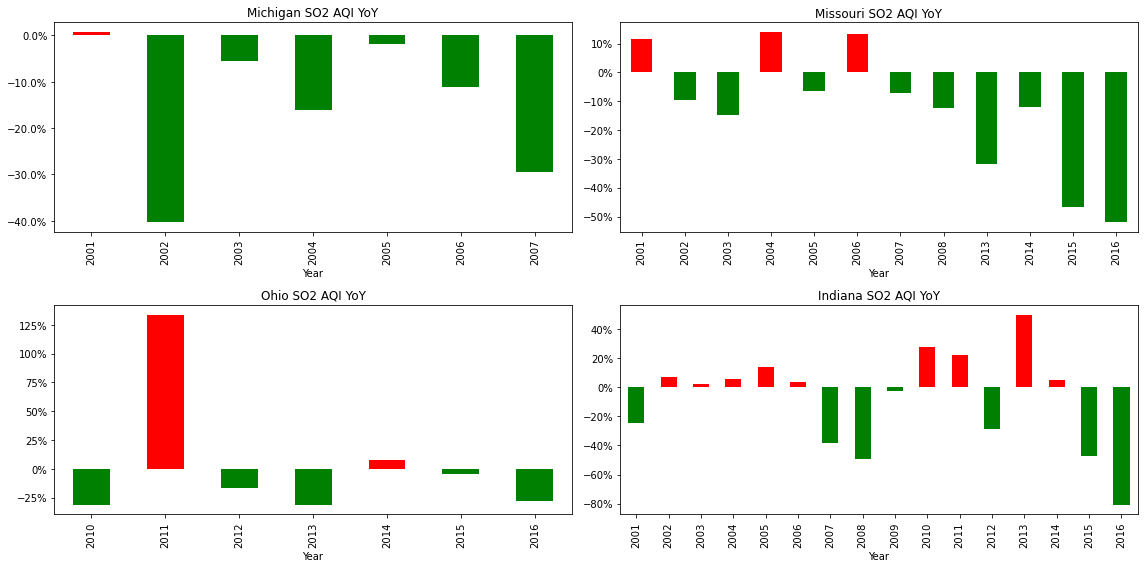

In [9]:
pct_aqi = df.groupby(['State','Year']).mean()
#so2_pct = pct_aqi.pct_change()['SO2 AQI'].loc[['Michigan','Missouri','Ohio','Indiana']]
plt.figure(figsize=(16,8))

# SO2 Change
plt.subplot(2,2,1)
so2_pct = pct_aqi.pct_change()['SO2 AQI'].loc[('Michigan', 2001):('Michigan',2016)]* 100
col = []
for val in so2_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = so2_pct['Michigan'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Michigan SO2 AQI YoY')

plt.subplot(2,2,2)
so2_pct = pct_aqi.pct_change()['SO2 AQI'].loc[('Missouri', 2001):('Missouri',2016)]* 100
col = []
for val in so2_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = so2_pct['Missouri'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Missouri SO2 AQI YoY')

plt.subplot(2,2,3)
so2_pct = pct_aqi.pct_change()['SO2 AQI'].loc[('Ohio', 2010):('Ohio',2016)]* 100
#Note: data from 2009 pulls from previous cell and skews the graph
col = []
for val in so2_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = so2_pct['Ohio'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Ohio SO2 AQI YoY')

plt.subplot(2,2,4)
so2_pct = pct_aqi.pct_change()['SO2 AQI'].loc[('Indiana', 2001):('Indiana',2016)]* 100
col = []
for val in so2_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = so2_pct['Indiana'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Indiana SO2 AQI YoY')

plt.tight_layout()
plt.show()

### Insight 5 (3):
Each graph is showing decreasing trends of SO2 productions from each of the Top 4 States with a range of -25% - -80%! Referring back to the Mean Pollutant Line Graph in Insight 2, SO2 has an overall decreasing trend of nearly 10% within the 16 years. Michigan has shown to be the most impactful state with a consistantly negative YoY change.

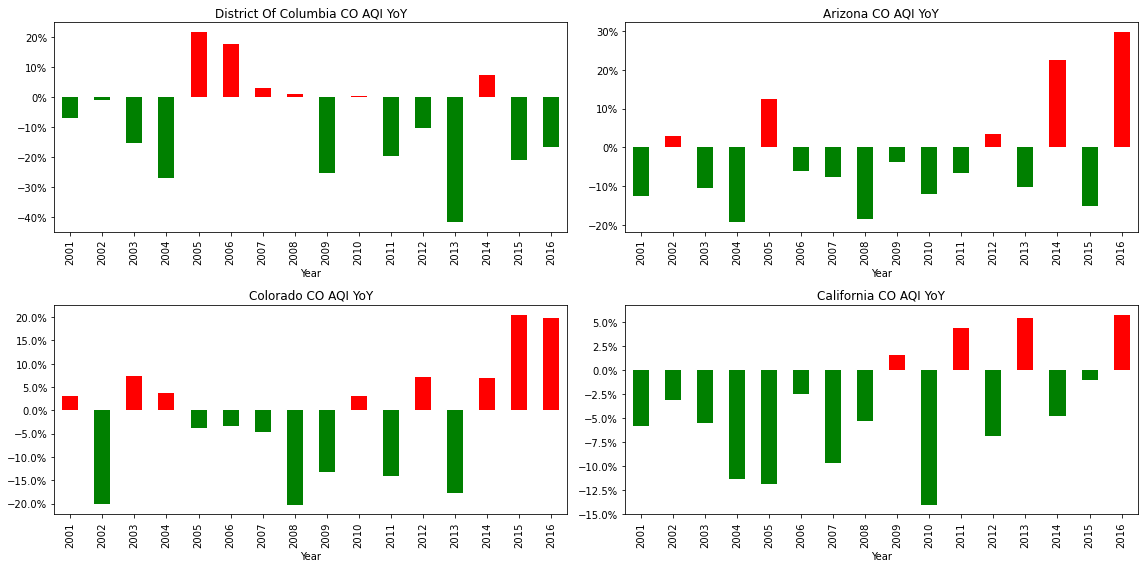

In [10]:
pct_aqi = df.groupby(['State','Year']).mean()
#co_pct = pct_aqi.pct_change()['CO AQI'].loc[['District Of Columbia','Arizona','Colorado','California']]
plt.figure(figsize=(16,8))

# CO Change
plt.subplot(2,2,1)
co_pct = pct_aqi.pct_change()['CO AQI'].loc[('District Of Columbia', 2001):('District Of Columbia',2016)]* 100
col = []
for val in co_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = co_pct['District Of Columbia'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('District Of Columbia CO AQI YoY')

plt.subplot(2,2,2)
co_pct = pct_aqi.pct_change()['CO AQI'].loc[('Arizona', 2001):('Arizona',2016)]* 100
col = []
for val in co_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = co_pct['Arizona'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Arizona CO AQI YoY')

plt.subplot(2,2,3)
co_pct = pct_aqi.pct_change()['CO AQI'].loc[('Colorado', 2001):('Colorado',2016)]* 100
col = []
for val in co_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = co_pct['Colorado'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Colorado CO AQI YoY')

plt.subplot(2,2,4)
co_pct = pct_aqi.pct_change()['CO AQI'].loc[('California', 2001):('California',2016)]* 100
col = []
for val in co_pct:
    if val > 0.0:
        col.append('Red')
    elif val <= 0.0:
        col.append('Green')
ax = co_pct['California'].plot(kind='bar', color = col)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('California CO AQI YoY')

plt.tight_layout()
plt.show()

### Insight 5 (4):
Although CO is the least contributing pollutant overall, we note that Arizona, Colorado, and California are showing and increase trend within 2010-2016 reaching as high as 20-30%. Referring back to the Mean Pollutant Line Graph, CO was showing a decreasing trend in production, these YoY charts share that it may reach back up to the original amount over time if no action is taken. 

# Conclusion:
How can the U.S. improve Air Quality by 5% by 2024 while reducing chemical pollutants? <br>
   - Reducing Nitrogen Dioxide (NO2): regulate housing/buildings near power plants, implement WFH business structure <br>
   - Reducing Sulphur Dioxide (SO2): control/minimize the use of high-sulfur coal, implement emissions control tech <br>
   - Reducing Ozone (O3): regulate toxic cleaning materials, implement ozone awareness times <br>
   - Reducing Carbon Monoxide (CO): reduce the use of fossil fuels, replace fossil fuel usage with solar energy <br>
   
After creating a timeline progression of the pollutant chemicals, we noticed an overall decreasing trend. We built a correlation heatmap and found that SO2 and NO2 almost perfectly depend on eachother, both at about 10% within 2000-2016. We narrowed the top 4 contributing states to each pollutant and did a year-over-year percentage change of each of the 13 states. Lastly, we identified Michigan, Missouri, Tennessee and California all showed a significant decreasing trend in polutant production among the top 13. 

Improving the overall AQI by 5% by 2024 is obtainable!

### Action:
- Investigate how Michigan, Missouri, Tennesee and California are reducing their pollutant reduction
- Implement findings and new found practices to the top contributing states through legislation and regulation
- Audit top contributors and continue the analysis of each state

### Limitations:
- Missing/Corrupted data throughout the years
- Other pollutant chemicals unnoted
- Contributors with shared borders and across the globe